In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./Bank_Customer.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id         10000 non-null int64
credit_score        10000 non-null int64
country             10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              10000 non-null int64
balance             10000 non-null float64
products_number     10000 non-null int64
credit_card         10000 non-null int64
active_member       10000 non-null int64
estimated_salary    10000 non-null float64
churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [30]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f571488ebd0>]],
      dtype=object)

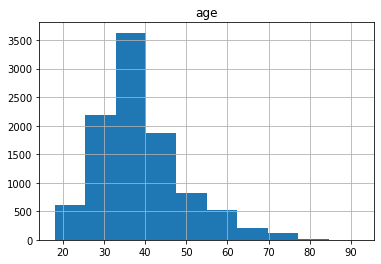

In [5]:
user =  data.copy()
user.hist(column="age")

<BarContainer object of 2 artists>

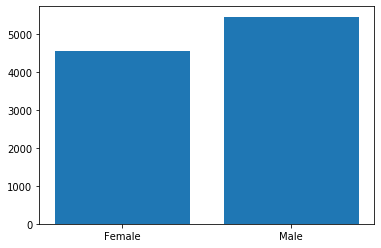

In [6]:
gender = user.groupby('gender').size()
x=['Female','Male']
y = [gender[0],gender[1]]
plt.bar(x,y)

In [7]:
user['gender'].replace(['Female','Male'],[0,1],inplace= True)
print(user['gender'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: gender, Length: 10000, dtype: int64


In [8]:
user['country'].replace(['France','Spain','Germany'],[0,1,2],inplace= True)
print(user['country'])

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    2
9999    0
Name: country, Length: 10000, dtype: int64


In [71]:
# data.loc(user[''])
#X 代表輸入資料, y 代表輸出結果
y = user['churn']                   # 變出 y 資料
# X = user.drop(['churn','customer_id'], axis=1) 
X = user.iloc[:, [4,3,7]].values
# X = user.drop(['churn','customer_id'], axis=1) 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
dx = PCA(n_components=2).fit_transform(X)
dx = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, y, test_size=0.2, random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [101]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf',gamma=0.9, C=1)

#使用Support Vector Classifier來建立模型
model.fit(dx_train,dy_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [102]:
predictions = model.predict(dx_test)

#載入classification_report & confusion_matrix來評估模型好壞
from sklearn.metrics import classification_report,confusion_matrix
# print(confusion_matrix(y_test,predictions))
# print('\n')
print(model.score(dx_test,dy_test))
print(classification_report(dy_test,predictions))

0.8445
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.69      0.41      0.52       405

    accuracy                           0.84      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



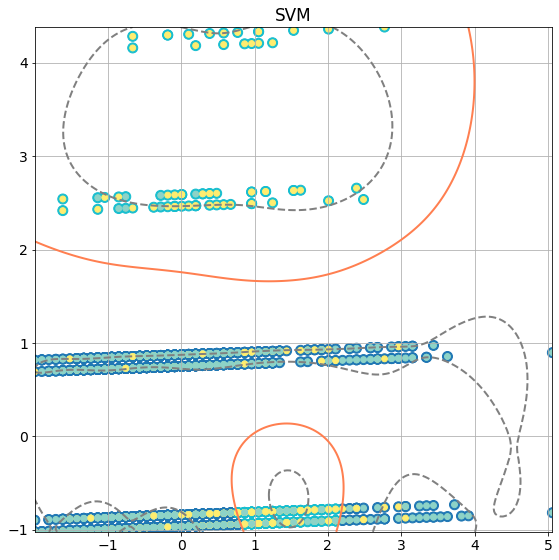

In [76]:
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(f'SVM')
plt.scatter(*dx_test.T, c=predictions, cmap='tab10', s=100)
plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35)
# 求出超平面與邊界
x_min = np.amin(dx_test.T[0])
x_max = np.amax(dx_test.T[0])
y_min = np.amin(dx_test.T[1])
y_max = np.amax(dx_test.T[1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = model.decision_function(
    np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
# 畫出超平面與邊界
plt.contour(XX, YY, Z, colors=['grey', 'coral', 'grey'],
            linestyles=['--', '-', '--'], linewidths=[2, 2, 2],
            levels=[-1, 0, 1])
plt.grid(True)
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.tight_layout()
plt.show()